PART TWO

In [ ]:
2*3

In [ ]:
print("Hello World")

In [ ]:
x = 10
print(x)
print(x+5)

y = x + 7
print(y)
print(z)

In [ ]:
list ( range(10) )

In [ ]:
for n in range(10):
    print(n)
    pass
print("done")

In [ ]:
for n in range(10):
    print("the square of", n, "is", n*n)
    pass
print("done")

In [ ]:
# fucntion that takes 2 numbers as input
# and outputs their average
def avg(x,y):
    print("first input is", x)
    print("second input is", y)
    a = (x+y) / 2.0
    print("average is", a)
    return a

In [ ]:
avg(2,4)

In [ ]:
avg(200, 301)

In [ ]:
import numpy

In [ ]:
a = numpy.zeros( [3,2])
print(a)

In [ ]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

In [ ]:
print(a[0,1])
v = a[1,0]
print(v)

In [ ]:
a[0,2]

In [ ]:
import matplotlib.pyplot
%matplotlib inline

In [ ]:
matplotlib.pyplot.imshow(a, interpolation="nearest")

In [ ]:
#class for a dog object
class Dog:
    
    #initializes method with internal data
    def __init__(self, petname, temp):
        self.name = petname;
        self.temperature = temp;
        
    #get status
    def status(self):
        print("dog name is ", self.name)
        print("dog temperature is ", self.temperature)
        pass
    
    #set temperature
    def setTemperature(self, temp):
        self.temperature = temp;
        pass
    
    #dogs can bark
    def bark(self):
        print("woof")
        pass
    pass

In [ ]:
sizzles = Dog()
sizzles.bark()

In [ ]:
sizzles = Dog()
mutley = Dog()

sizzles.bark()
mutley.bark()

In [ ]:
lassie = Dog("Lassie", 37)
lassie.status()

In [ ]:
lassie.setTemperature(40)
lassie.status()

In [ ]:
import numpy
#scipy.special for the sigmoid function expit()
import scipy.special

#neural network class definition
class neuralNetwork:
    
    #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #w11  w21
        #w12  w22  etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
                
        #learning rate
        self.lr = learningrate
                    
        #activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    #train the neural network
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.wo, hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #output layer error is the (target - actual)
        output_errors = targets - final_outputs
        #hidden layer error is the output_erros, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update the weights for the links between the hidden and output
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        #update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    #query the neural network
    def query(self, inputs_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
                    
        #calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate the signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
                    
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
                    
        return final_outputs

In [ ]:
#number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

#learning rate is 0.3
learning_rate = 0.3

#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [ ]:
n.query([1.0, 0.5, -1.5])

In [ ]:
data_file = open("mnist_data/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [ ]:
len(data_list)

In [ ]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [ ]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation='None')

In [ ]:
all_values = data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation='None')

In [ ]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

In [ ]:
#output nodes is 10
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [ ]:
print(targets)

In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [10]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [11]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [12]:
training_data_file = open("mnist_data/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [13]:
for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [14]:
test_data_file = open("mnist_data/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [15]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


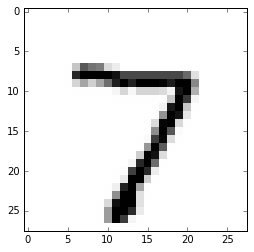

In [16]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation='None')

In [17]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[ 0.04300604],
       [ 0.00506365],
       [ 0.01825693],
       [ 0.04061699],
       [ 0.02876216],
       [ 0.00695994],
       [ 0.00565825],
       [ 0.83162612],
       [ 0.02668584],
       [ 0.02775792]])

In [18]:
#testing the neural network

#scorecard for seeing how well the network performs
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    #correct answer is first value
    correct_label = int(all_values[0])
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query the network
    outputs = n.query(inputs)
    #the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #append correct or incorrect to list
    if (label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [19]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [20]:
#performance score as fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6


In [21]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [22]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [23]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [24]:
training_data_file = open("mnist_data/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [25]:
for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [31]:
test_data_file = open("mnist_data/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [32]:
#testing the neural network

#scorecard for seeing how well the network performs
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    #correct answer is first value
    correct_label = int(all_values[0])
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query the network
    outputs = n.query(inputs)
    #the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #append correct or incorrect to list
    if (label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [33]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [34]:
#performance score as fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9445


In [37]:
#follow-on training for neural network
#epochs is number of times the training data set is used for training

epochs = 2

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [38]:
#testing the neural network

#scorecard for seeing how well the network performs
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    #correct answer is first value
    correct_label = int(all_values[0])
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query the network
    outputs = n.query(inputs)
    #the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #append correct or incorrect to list
    if (label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [39]:
#performance score as fraction of correct answers for epochs
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9536


PART THREE

In [58]:
import numpy
import scipy.special
import matplotlib.pyplot

%matplotlib inline

In [59]:
import scipy.misc
import glob

In [60]:
class neuralNetwork:
        
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    def train(self, inputs_list, targets_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [61]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [62]:
training_data_file = open("mnist_data/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [63]:
#Basic Training for Neural Network
epochs = 2

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [64]:
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('my_images/2828_my_own_?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = scipy.misc.imread(image_file_name, flatten=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

loading ...  my_images\2828_my_own_2.png
0.01
1.0
loading ...  my_images\2828_my_own_3.png
0.01
1.0
loading ...  my_images\2828_my_own_4.png
0.01
0.930118
loading ...  my_images\2828_my_own_5.png
0.01
0.868
loading ...  my_images\2828_my_own_6.png
0.01
1.0


[[  2.44525230e-03]
 [  6.01007803e-02]
 [  4.15687406e-01]
 [  2.50990874e-02]
 [  7.66049967e-02]
 [  4.75854716e-03]
 [  2.54503049e-04]
 [  1.07606963e-01]
 [  1.31426121e-03]
 [  2.05187367e-03]]
network says  2
match!
[[  1.19066717e-03]
 [  3.06639746e-02]
 [  2.90502555e-03]
 [  8.65512572e-01]
 [  6.44539971e-04]
 [  4.09171403e-02]
 [  3.34879029e-03]
 [  4.77609621e-03]
 [  7.39145498e-04]
 [  8.73567143e-04]]
network says  3
match!
[[  9.25805768e-04]
 [  2.32275743e-03]
 [  4.60968893e-02]
 [  5.87381095e-04]
 [  8.91908167e-01]
 [  9.26307805e-03]
 [  1.21778083e-02]
 [  1.98078244e-02]
 [  1.22663032e-04]
 [  1.66524323e-03]]
network says  4
match!
[[  1.61733596e-03]
 [  4.91422597e-03]
 [  6.04073345e-03]
 [  2.00660011e-02]
 [  2.30745856e-04]
 [  4.50651708e-01]
 [  3.21270215e-02]
 [  1.82930952e-02]
 [  6.79073556e-04]
 [  1.70461378e-03]]
network says  5
match!
[[ 0.00615045]
 [ 0.0328792 ]
 [ 0.00085904]
 [ 0.0132461 ]
 [ 0.00462634]
 [ 0.06629053]
 [ 0.30952072]

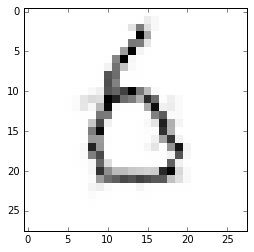

In [69]:
for i in range(0,5):
    item = i

    # plot image
    matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

    # correct answer is first value
    correct_label = our_own_dataset[item][0]
    # data is remaining values
    inputs = our_own_dataset[item][1:]

    # query the network
    outputs = n.query(inputs)
    print (outputs)

    label = numpy.argmax(outputs)
    print("network says ", label)
    # append correct or incorrect to list
    if (label == correct_label):
        print ("match!")
    else:
        print ("no match!")
        pass

In [70]:
#backwards query

import numpy
import scipy.special
import matplotlib.pyplot

%matplotlib inline

In [71]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [72]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [73]:
training_data_file = open("mnist_data/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [74]:
#Basic Training for Neural Network
epochs = 2

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [75]:
#scorecard for seeing how well the network performs
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    #correct answer is first value
    correct_label = int(all_values[0])
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query the network
    outputs = n.query(inputs)
    #the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #append correct or incorrect to list
    if (label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [76]:
#performance score as fraction of correct answers for epochs
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9662


[ 0.99  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]


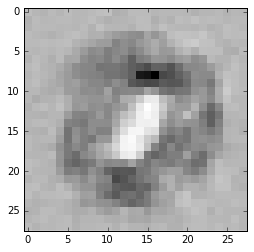

In [78]:
#run network backwards, given a label and see what image it produces

label = 0

targets = numpy.zeros(output_nodes) + 0.01
targets[label] = 0.99
print(targets)

image_data = n.backquery(targets)
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

In [83]:
import numpy
import matplotlib.pyplot
%matplotlib inline

import scipy.ndimage

In [84]:
data_file = open("mnist_data/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

record = 6

In [85]:
all_values = data_list[record].split(',')
scaled_input = ((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01).reshape(28,28)



print(numpy.min(scaled_input))
print(numpy.max(scaled_input))

0.01
1.0


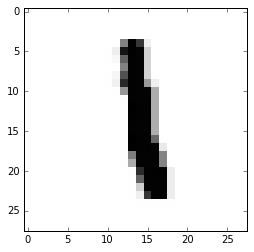

In [86]:
# plot the original image
matplotlib.pyplot.imshow(scaled_input, cmap='Greys', interpolation='None')

In [87]:
inputs_plus10_img = scipy.ndimage.rotate(scaled_input, 10.0, cval=0.01, order=1, reshape=False)
inputs_minus10_img = scipy.ndimage.rotate(scaled_input, -10.0, cval=0.01, order=1, reshape=False)

In [88]:
print(numpy.min(inputs_plus10_img))
print(numpy.max(inputs_plus10_img))

0.01
0.99748795356


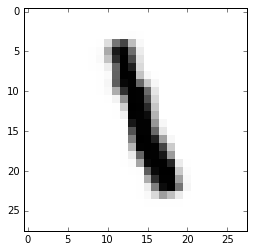

In [89]:
#10 degree rotation
matplotlib.pyplot.imshow(inputs_plus10_img, cmap='Greys', interpolation='None')

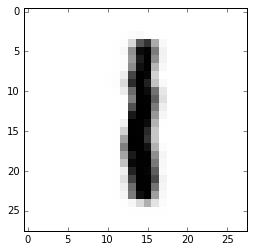

In [90]:
#10 degrees rotated the other way
matplotlib.pyplot.imshow(inputs_minus10_img, cmap='Greys', interpolation='None')